In [ ]:
import os
import glob
import torch
import gc

# # yolov5
---

## # yolov5 가져오기
---

In [ ]:
%cd /content/drive/MyDrive/workspace/study/3D_Object_detection
!git clone https://github.com/ultralytics/yolov5

/content/drive/MyDrive/workspace/study/3D_Object_detection
Cloning into 'yolov5'...
remote: Enumerating objects: 12344, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 12344 (delta 21), reused 29 (delta 15), pack-reused 12292
Receiving objects: 100% (12344/12344), 12.67 MiB | 6.84 MiB/s, done.
Resolving deltas: 100% (8490/8490), done.


## # 모듈 임포트
---

In [ ]:
%cd /content/drive/MyDrive/workspace/study/3D_Object_detection/yolov5
!pip install -r requirements.txt  # install

/content/drive/MyDrive/workspace/study/3D_Object_detection/yolov5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 6.9 MB/s 


## # 사전학습된 모델 다운로드
---

In [ ]:
import torch

# 사전 학습된 모델 뽑아내기
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # or yolov5n, yolov5x6, custom

/usr/local/lib/python3.7/dist-packages/torch/hub.py:267: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  "You are about to download and run code from an untrusted repository. In a future release, this won't "
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2022-9-16 Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)



  0%|          | 0.00/14.1M [00:00<?, ?B/s]


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


## # 데이터에 맞춰 yaml 생성
---

In [ ]:
import glob
from sklearn.model_selection import train_test_split

img_list = sorted(glob.glob('/data/hwang/datasets/kitti/training/images/*.png'))

train_list, val_list = train_test_split(img_list, test_size = 0.2, random_state = 0)

with open('/home/ubuntu/kimgh/yolov5/kitti_yaml/train.txt', 'w') as f:
    f.write('\n'.join(train_list) + '\n')
    
with open('/home/ubuntu/kimgh/yolov5/kitti_yaml/val.txt', 'w') as f:
    f.write('\n'.join(val_list) + '\n')
    
# with open('')

## # cuda 확인
---

In [ ]:
# gpu 캐시 삭제

import gc
gc.collect()
torch.cuda.empty_cache()

In [ ]:
print(torch.cuda.is_available())
print(torch.cuda.device_count())
print(torch.cuda.current_device())

True
1
0


In [ ]:
torch.cuda.get_device_name(0)

'Tesla P100-PCIE-16GB'

In [ ]:
# gpu 할당

import os
import torch

os.environ['CUDA_DEVICE_ORDER'] = 'PCI_BUS_ID'
os.environ['CUDA_VISIBLE_DEVICES'] = '0, 1' # gpu 여러개 할당

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## # 훈련
---

In [ ]:
# 훈련

%cd /home/ubuntu/kimgh/yolov5
!python train.py --img 640 --batch 16 --epochs 50 --data ./data/kitti.yaml --cfg ./models/yolov5x_kitti.yaml --weights yolov5x.pt --optimizer Adam --name kitti_result

## # 검증
---

In [ ]:
# 검증

%cd /home/ubuntu/kimgh/yolov5
!python val.py --weights ./runs/train/kitti_result3/weights/best.pt --data ./data/kitti.yaml --img 640

## # 테스트
---

In [ ]:
# 테스트

%cd /content/drive/MyDrive/workspace/study/3D_Object_detection/yolov5

path = '/content/drive/MyDrive/workspace/study/3D_Object_detection/OpenPCDet/data/kittimot/training/image_02'
folder_list = sorted(os.listdir(path))

for folder_name in folder_list[:1]:
    source_path = path + '/' + folder_name
    !python detect.py --weights ./weights/yolo5s_kitti.pt --img 640 --conf 0.4 --source {source_path} --name {'train/' + folder_name} --data ./data/kitti.yaml \
        --save-txt --save-conf --exist-ok --device 0

/content/drive/MyDrive/workspace/study/3D_Object_detection/yolov5
detect: weights=['./weights/yolo5s_kitti.pt'], source=/content/drive/MyDrive/workspace/study/3D_Object_detection/OpenPCDet/data/kittimot/training/image_02/0000, data=./data/kitti.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=True, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=train/0000, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-117-ga1e5f9a Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
YOLOv5s_kitti summary: 213 layers, 7031701 parameters, 0 gradients, 15.8 GFLOPs
image 1/154 /content/drive/MyDrive/workspace/study/3D_Object_detection/OpenPCDet/data/kittimot/training/image_02/0000/000000.png: 224x640 1 Car, 1 Pedestrian, 1 Cyclist, 9.5ms

## # 프레임 라벨 하나로 합치기
---

In [ ]:
# import glob
# from sklearn.model_selection import train_test_split

# img_list = sorted(glob.glob('/data/hwang/datasets/kitti/training/images/*.png'))

# train_list, val_list = train_test_split(img_list, test_size = 0.2, random_state = 0)

# with open('/home/ubuntu/kimgh/yolov5/kitti_yaml/train.txt', 'w') as f:
#     f.write('\n'.join(train_list) + '\n')
    
# with open('/home/ubuntu/kimgh/yolov5/kitti_yaml/val.txt', 'w') as f:
#     f.write('\n'.join(val_list) + '\n')

    
# # with open('')

In [ ]:
import pandas as pd
import re
import os

label_path = '/content/drive/MyDrive/workspace/study/3D_Object_detection/yolov5/runs/detect/train/0000/labels/'
frame_list = sorted(os.listdir(label_path))

label_df = pd.DataFrame()
for frame in frame_list:
    frame_num = int(re.search('[0-9]*', frame)[0])
    frame_df = pd.read_csv(label_path + frame, header = None, sep = ' ').replace(0, f'{frame_num}', regex = True)
    # frame_df = frame_df.replace(' ', ',', regex = True)

    label_df = pd.concat((label_df, frame_df), axis = 0)

label_df.to_csv('/content/drive/MyDrive/workspace/study/3D_Object_detection/yolov5/runs/detect/train/0000/0000.txt', index = None, header = None, sep = ',')

# # 로컬에서 모델 로드
---

In [ ]:
import cv2
import torch
import io
from PIL import Image

In [ ]:
!pip install -r https://raw.githubusercontent.com/ultralytics/yolov5/master/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


HTTPError: ignored

In [ ]:
weights = '/content/drive/MyDrive/workspace/study/3D_Object_detection/yolov5/weights/yolo5s_kitti.pt'

# model = torch.hub.load('ultralystics/yolov5', 'yolov5s') # 깃에서 직접 불러오기
model = torch.hub.load('/content/drive/MyDrive/workspace/study/3D_Object_detection/yolov5', 'custom', path = weights, source = 'local') # 로컬에서 불러오기

In [ ]:
path = '/content/drive/MyDrive/workspace/study/3D_Object_detection/OpenPCDet/data/kittimot/training/image_02'
folder_list = sorted(os.listdir(path))

img = path + '/' + folder_list[0] + '/000000.png'

In [ ]:
results = model(img)

In [ ]:
df = results.pandas().xyxy[0]
df

,xmin,ymin,xmax,ymax,confidence,class,name
0,296.929321,159.425903,463.583405,290.025940,0.911835,0,Car
1,1109.494873,166.405472,1188.955933,311.626038,0.799027,3,Pedestrian
2,759.176270,167.032288,903.956604,368.379730,0.784215,5,Cyclist
3,296.880493,168.810913,462.718475,289.157623,0.363551,1,Van


In [ ]:
a = df.iloc[0][:4].values.astype('float')
list(a)

[296.9293212890625, 159.4259033203125, 463.5834045410156, 290.02593994140625]

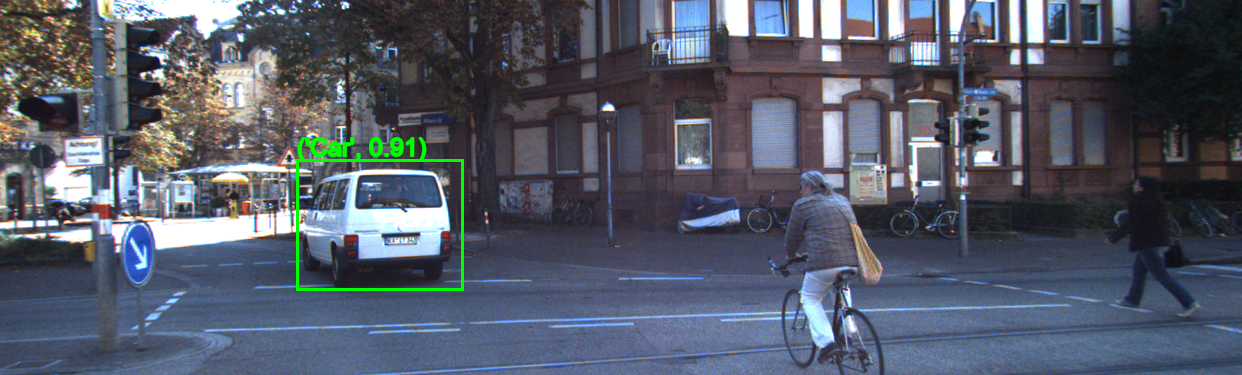

In [ ]:
from PIL import Image, ImageDraw, ImageFont

img_ = Image.open(img).convert('RGB')

color = (0,255,0)

font_size = 15
font = ImageFont.truetype('/content/drive/MyDrive/workspace/study/3D_Object_detection/yolov5/fonts/arial.ttf', 25) # arial.ttf 글씨체, font_size=15

# box_color_RGBA  = (0,255,0,255)
# fill_color_RGBA = (0,255,0,50)
# draw = ImageDraw.Draw(img_, 'RGBA') # RGBA
# draw.rectangle((100,100,300,300), outline=box_color_RGBA, fill=fill_color_RGBA, width = 3)
# img_.show()

draw = ImageDraw.Draw(img_)
text_pos = (a[0], a[1]-27)
draw.text(text_pos, f"{df['name'][0], round(df['confidence'][0], 2)}", fill = color, font = font, stroke_width = 1)
draw.rectangle(list(a), outline = color, width = 3)
# img_.show()

img_